In [223]:
import numpy as np
import pandas as pd

In [224]:
df=pd.read_csv("Maternal Health Risk Data Set.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [225]:
df.shape

(1014, 7)

In [226]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [227]:
df2=df.copy()
df2["RiskLevel"]=df2["RiskLevel"].apply(lambda x: 0 if x=="low risk" else 1 if x=="mid risk" else 2 )
df2.columns
for i in df2.columns:
    print(i)

Age
SystolicBP
DiastolicBP
BS
BodyTemp
HeartRate
RiskLevel


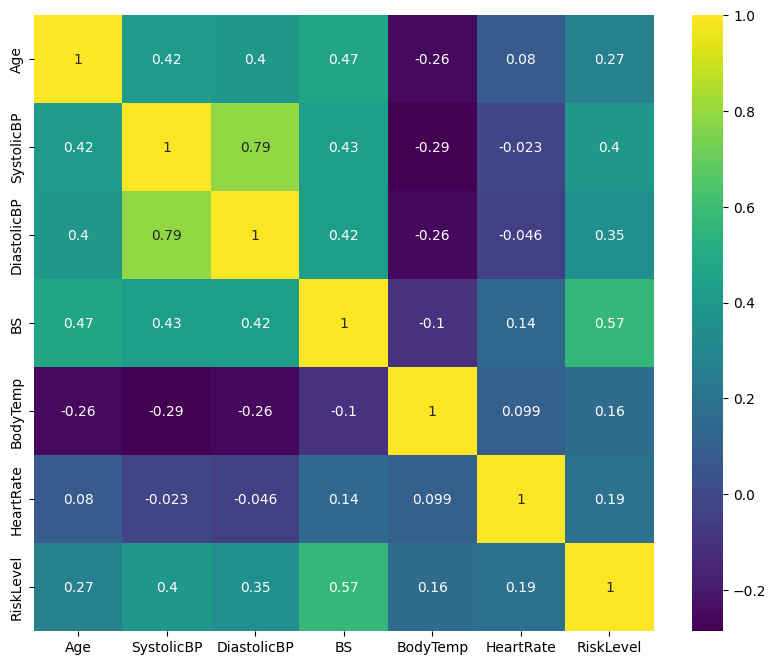

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.heatmap(df2.corr() , annot = True , cmap = 'viridis')
plt.show()

In [229]:
df2.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel        int64
dtype: object

In [230]:
df["BodyTemp"].describe()

count    1014.000000
mean       98.665089
std         1.371384
min        98.000000
25%        98.000000
50%        98.000000
75%        98.000000
max       103.000000
Name: BodyTemp, dtype: float64

<Axes: >

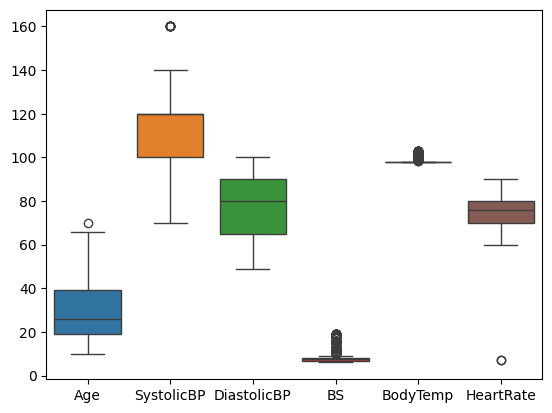

In [231]:
sns.boxplot(df2.drop('RiskLevel' , axis = 1))

In [232]:
for i in df2.columns:
    if (i!='RiskLevel'):
    
        q1,q3=df2[i].quantile([0.25,0.75])
        iqr=q3-q1
        min=q1-1.5*iqr
        max=q3+1.5*iqr
        df2=df2[(df2[str(i)]>=min)&(df2[str(i)]<=max)]
        print(df2.shape)


(1013, 7)
(1003, 7)
(1003, 7)
(803, 7)
(622, 7)
(600, 7)


In [233]:
df2.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,600.000000,600.000000,600.000000,600.000000,600.0,600.00000,600.000000
mean,27.898333,111.705000,75.070000,7.158850,98.0,72.51000,0.523333
std,12.041997,16.981812,13.253346,0.571617,0.0,5.94661,0.645614
min,10.000000,70.000000,49.000000,6.000000,98.0,60.00000,0.000000
25%,19.000000,100.000000,65.000000,6.800000,98.0,70.00000,0.000000
50%,23.000000,120.000000,80.000000,7.000000,98.0,70.00000,0.000000
75%,32.000000,120.000000,85.000000,7.500000,98.0,77.00000,1.000000
max,66.000000,140.000000,100.000000,9.000000,98.0,86.00000,2.000000


In [234]:

df2[df2['RiskLevel']==1].value_counts().sum()

214

In [235]:
df2[df2["Age"]<18]
df2[df2["Age"]<18].value_counts().sum()

90

In [236]:
df2["Age"].mean()

27.898333333333333

In [237]:
#df2["Age"]=df2["Age"].apply(lambda x: int(df2["Age"]) if (df2["Age"]<18) else df2["Age"])
mean_age = df2['Age'].mean()

# Remplacement des valeurs inférieures à 18 par la moyenne
df2.loc[df2['Age'] < 18, 'Age'] = mean_age

C:\Users\yassi\AppData\Local\Temp\ipykernel_12640\1226678255.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.898333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['Age'] < 18, 'Age'] = mean_age


In [238]:
df2[df2['Age'] < 18]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


In [239]:
df2.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.046911,0.058741,0.025011,NaN,0.052450,-0.022116
SystolicBP,0.046911,1.000000,0.740435,0.068414,NaN,-0.114561,0.444574
DiastolicBP,0.058741,0.740435,1.000000,0.223090,NaN,-0.223824,0.322517
BS,0.025011,0.068414,0.223090,1.000000,NaN,-0.104541,0.050444
BodyTemp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HeartRate,0.052450,-0.114561,-0.223824,-0.104541,NaN,1.000000,0.116477
RiskLevel,-0.022116,0.444574,0.322517,0.050444,NaN,0.116477,1.000000


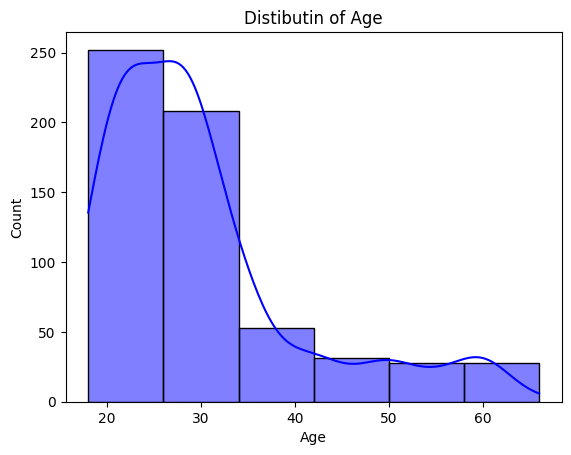

In [240]:
sns.histplot(df2['Age'], bins=6, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of Age')
plt.show()

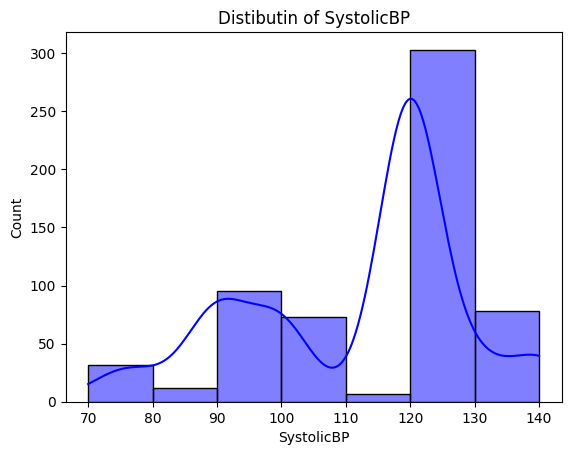

In [241]:
sns.histplot(df2['SystolicBP'], bins=7, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of SystolicBP')
plt.show()

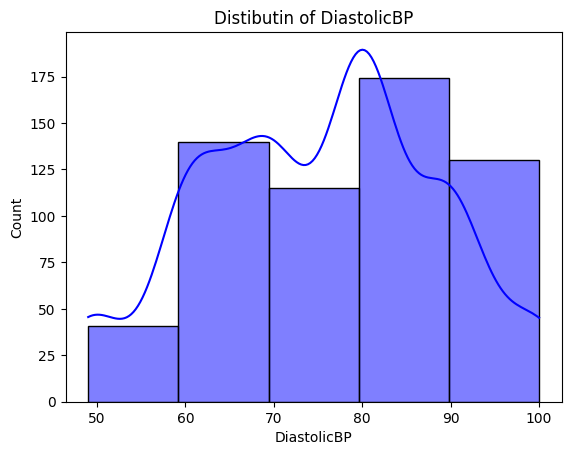

In [242]:
sns.histplot(df2['DiastolicBP'], bins=5, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of DiastolicBP')
plt.show()

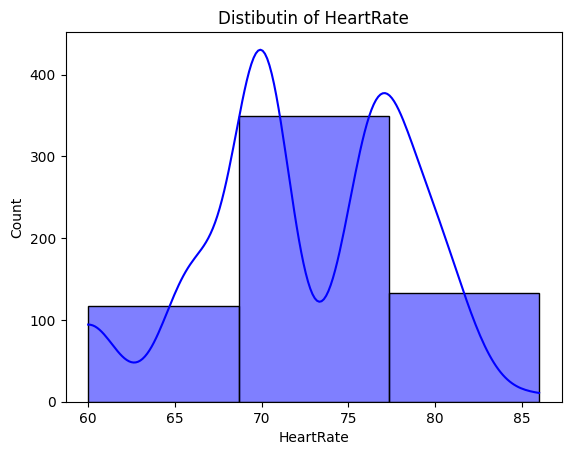

In [243]:
sns.histplot(df2['HeartRate'], bins=3, kde=True, color='blue', edgecolor='k')
plt.title('Distibutin of HeartRate')
plt.show()

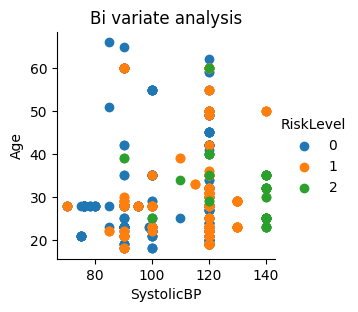

In [244]:
sns.FacetGrid(df2, hue = "RiskLevel").map(plt.scatter , "SystolicBP" , "Age" ).add_legend();
plt.title('Bi variate analysis')
plt.show()

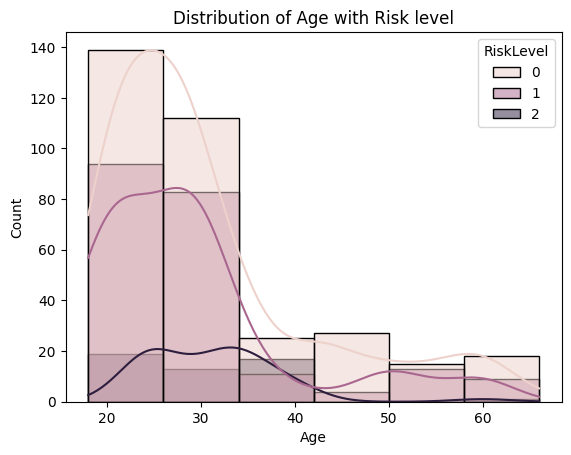

In [245]:
sns.histplot(data=df2, x='Age', hue='RiskLevel', kde=True , bins = 6)
plt.title('Distribution of Age with Risk level')
plt.show()

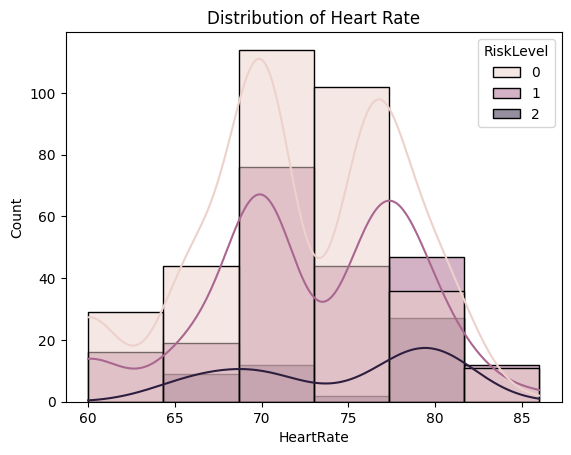

In [246]:
sns.histplot(data=df2, x='HeartRate', hue='RiskLevel', kde=True , bins = 6)
plt.title('Distribution of Heart Rate')
plt.show()

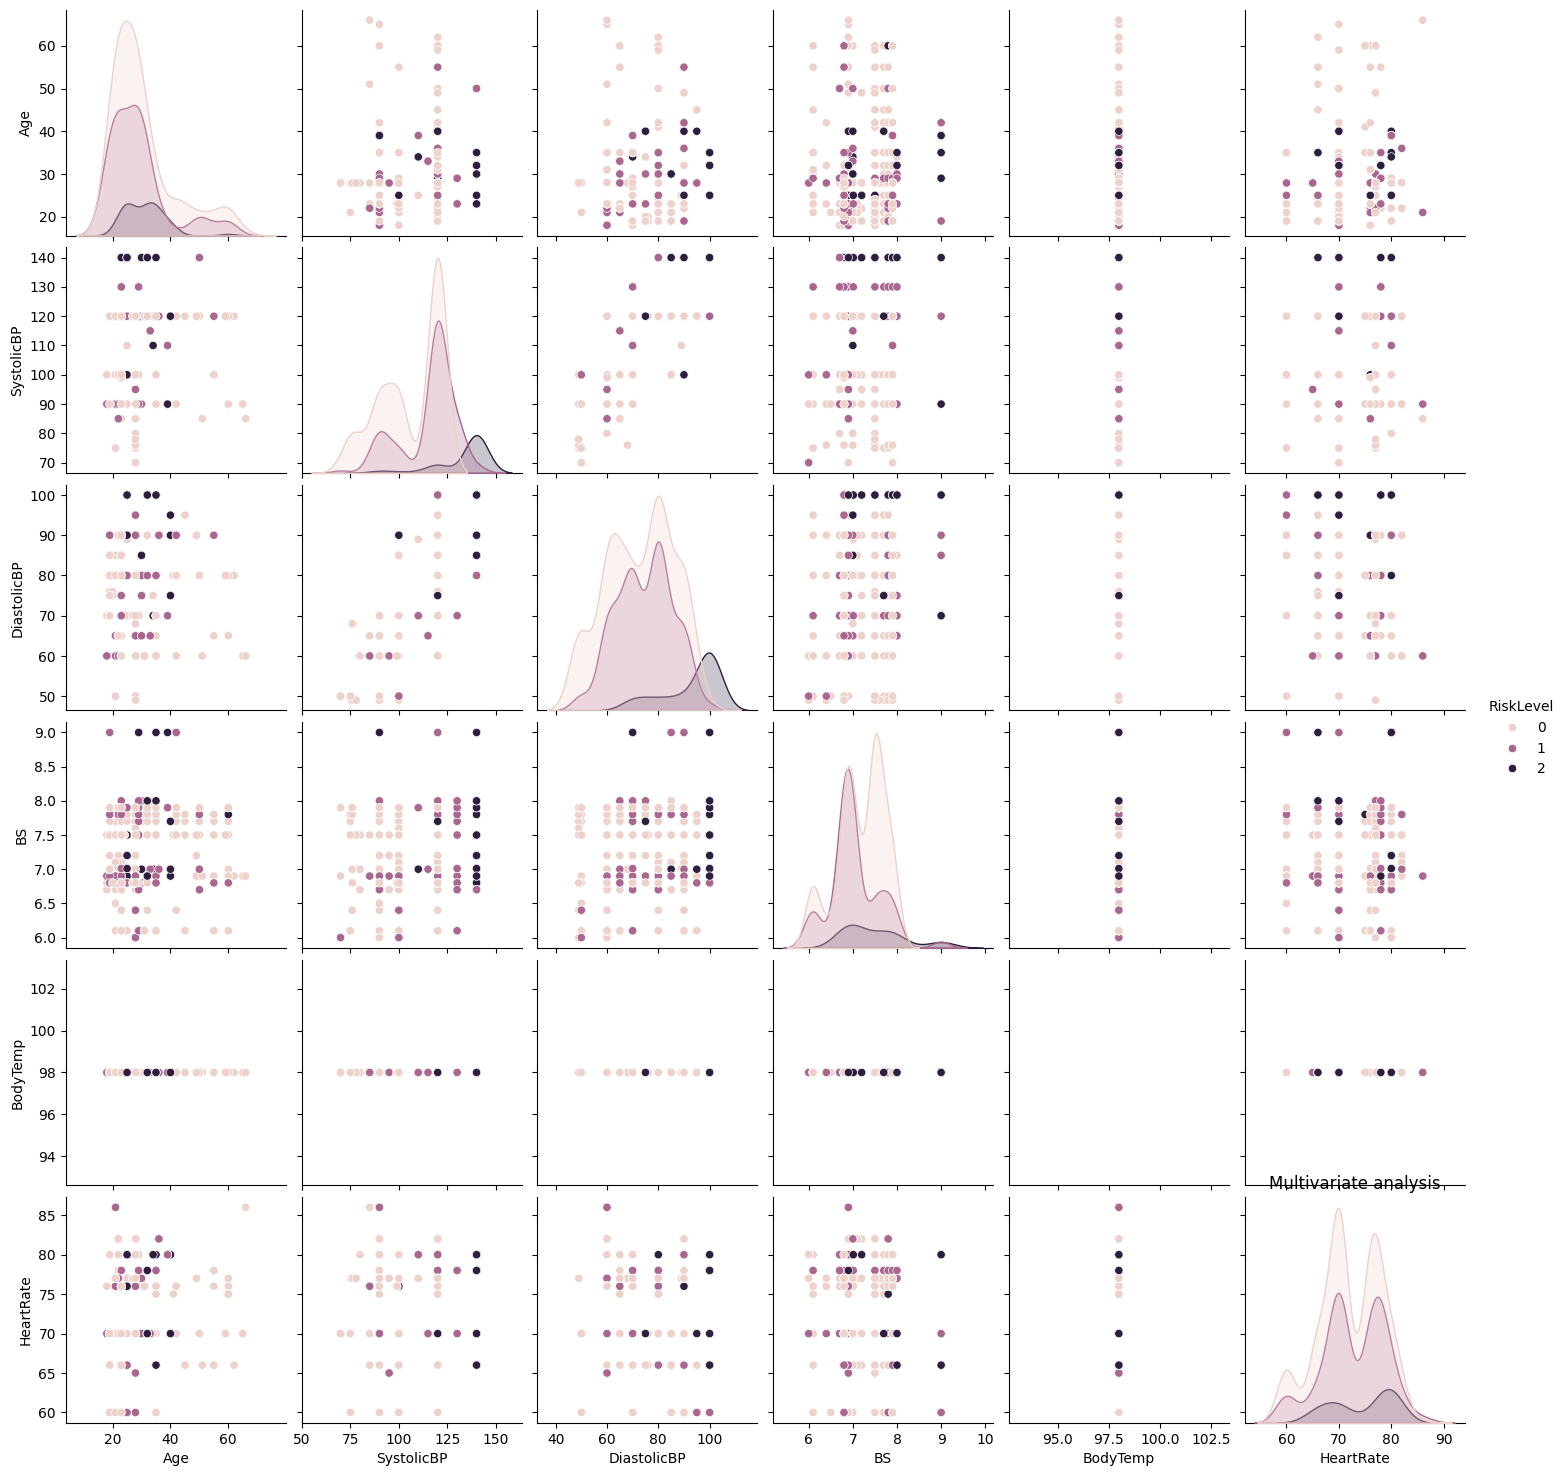

In [247]:
sns.pairplot(df2 , hue = 'RiskLevel')
plt.title('Multivariate analysis')
plt.show()

In [248]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from xgboost import XGBClassifier
from xgboost import XGBRFRegressor
model_params={
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
            
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    
    'GaussianNB':{'model':GaussianNB(),'params':{}},
    
    'MultinomialNB':{'model':MultinomialNB(),'params':{}},
    'XGBClassifier':{'model':XGBClassifier(),'params':{}},
    'XGBRFRegressor':{'model':XGBRFRegressor(),'params':{}}
}
#####################################################################################
scores = []

for model_name, mp in model_params.items():
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(df2[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']],df2['RiskLevel'])
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,DecisionTreeClassifier,0.818333,{}
1,svm,0.778333,"{'C': 20, 'kernel': 'rbf'}"
2,random_forest,0.820000,{'n_estimators': 10}
3,GaussianNB,0.638333,{}
4,MultinomialNB,0.586667,{}
5,XGBClassifier,0.833333,{}
6,XGBRFRegressor,0.543754,{}


In [249]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df2[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']],df2['RiskLevel'])
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(450, 6)
(150, 6)
(450,)
(150,)


In [250]:
model=DecisionTreeClassifier(random_state=42)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.84

In [251]:
model=RandomForestClassifier(random_state=42)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8266666666666667

In [252]:
model.predict([[50,140,80,6.7,98,70]])

c:\Users\yassi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [253]:
import pickle
with open('model.pickle','wb') as f:
    pickle.dump(model,f)